<h1 style="text-align: center;"><strong>Machine Learning Project Interim Report</strong></h1>
<h2 style="text-align: center;"><strong>TensorFlow Speech Recognition Challenge</strong></h2>
<h3 style="text-align: center;"><strong>Mustafa Salih Oğuz | 213012263</strong></h3>
<h3><strong>1. Introduction</strong></h3>
<p>In this project I try to recognize words from short audio files. This is a Kaggle Competition opened by Google Brain. Aim of the competition is to be able to recognize 10 labeled words, silence and unknown words as accurate as possible from thousands of various one second audio files.</p>
<p>The way I am going to try to achieve this by converting .wav auido files into spectograms and wave forms which are image files. Then I will use these images to train my CNN. I plan to use Keras with&nbsp;TensorFlow backend when building the CNN.</p>
<p>Until this point I explored and preprocessed the data. Then I managed to convert wav files into spectrogram and wave forms. Next step will be building CNN with Keras and feeding images to the CNN.</p>
<h3><strong>2. Load Libraries</strong></h3>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
import IPython.display as ipd
from scipy import signal
from subprocess import check_output
import librosa
import librosa.display
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import tensorflow
import keras
import gc

<h3><strong>3. Data Exploration</strong></h3>
<p>Firstly, I tried to understand the data. I knew that there are one second long wav files that are labeled in different folders. I needed to learn what are the labels and how many are there. I found that:</p>
<ul>
<li>There is 2.1 GB of data</li>
<li>Total of 64.727 .wav files</li>
<li>31 Labels</li>
</ul>
<p>Printing all labels:</p>

In [2]:
# Kaggle version
"""words = []
counts = []

for i in check_output(["ls", "../input/train/audio"]).decode("utf8").split("\n"):
    count = 0
    for j in check_output(["ls", "../input/train/audio/"+i]).decode("utf8").split("\n"):
        count+=1
    words.append(i)
    counts.append(count)

print(words)"""

'words = []\ncounts = []\n\nfor i in check_output(["ls", "../input/train/audio"]).decode("utf8").split("\n"):\n    count = 0\n    for j in check_output(["ls", "../input/train/audio/"+i]).decode("utf8").split("\n"):\n        count+=1\n    words.append(i)\n    counts.append(count)\n\nprint(words)'

In [3]:
words = []
counts = []

for i in os.listdir(os.getcwd()+"/train/audio"):
    count = 0
    for j in os.listdir(os.getcwd()+"/train/audio/"+i):
        count+=1
    words.append(i)
    counts.append(count)
    
print(words)

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero', '_background_noise_']


Plotting number of recordings for each label:

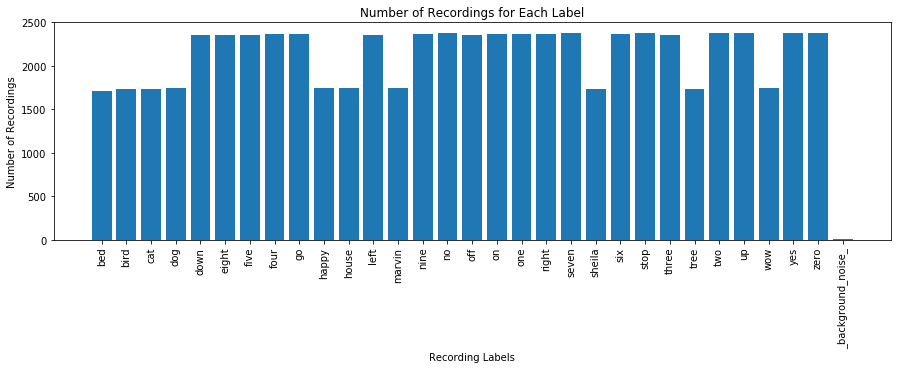

In [4]:
x = np.arange(len(counts))
plt.figure(figsize=(15,4))
plt.bar(x, height= counts)
plt.title("Number of Recordings for Each Label")
plt.ylabel("Number of Recordings")
plt.xlabel("Recording Labels")
plt.xticks(x, words, rotation=90);

<h3><strong>4. Data Preprocerssing</strong></h3>
For now, preprocessing part will be postponed in order to get a better understanding of the data, audio visualization and CNN's.
Getting all file paths in a list of dictionaries:

In [5]:
# Kaggle version
"""path = "../input/train/audio"
all_file_paths = {}
for i in words:
    all_file_paths.setdefault(i,[])
    for j in check_output(["ls", path+ "/" +i]).decode("utf8").split("\n"):
        filename = j
        all_file_paths[i].append(path  + "/" + i + "/" + filename)"""

'path = "../input/train/audio"\nall_file_paths = {}\nfor i in words:\n    all_file_paths.setdefault(i,[])\n    for j in check_output(["ls", path+ "/" +i]).decode("utf8").split("\n"):\n        filename = j\n        all_file_paths[i].append(path  + "/" + i + "/" + filename)'

In [4]:
# Standard version
path = os.getcwd()+"\\train\\audio"
all_file_paths = {}
for i in words:
    all_file_paths.setdefault(i,[])
    for j in os.listdir(os.getcwd()+"/train/audio/"+i):
        filename = j
        all_file_paths[i].append(path  + "\\" + i + "\\" + filename)

<h3><strong>5. Waveforms</strong></h3>
<p>In this part, raw wave of auido will be plotted. Simplest way of visualizing a sound is to convert it into waveform and display its waves.</p>
<p>I will first read an example audio file and use it for the rest of the report to display all the features.</p>

In [7]:
# First read the example audio file
example_rate, example = wavfile.read(all_file_paths["yes"][0])

# Then Listen to it
ipd.Audio(example, rate=example_rate)

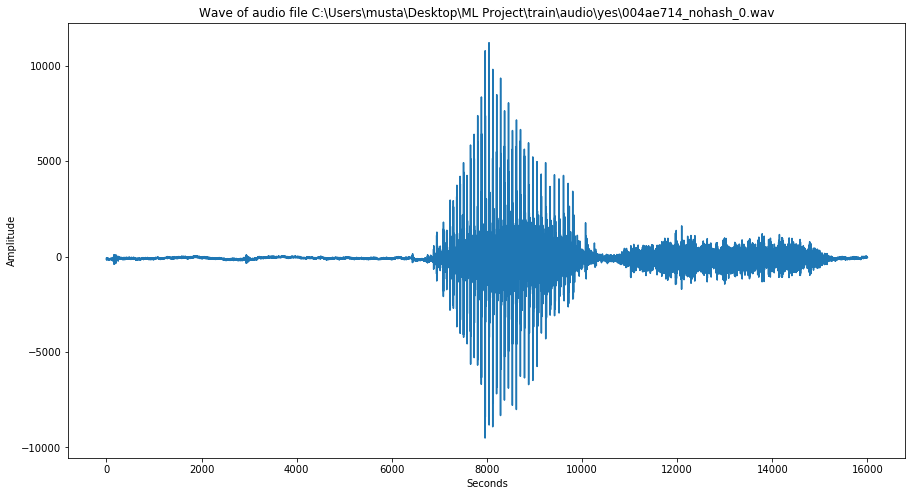

In [8]:
# Plotting the waveform
fig = plt.figure(figsize=(15,8))
plt.xlabel("Seconds")
plt.ylabel("Amplitude")
plt.title("Wave of audio file " + all_file_paths["yes"][0].split("/")[-1])
plt.plot(example)

Above graphic has too many little details that may or may not effect the machine learning algorithm in a good way. So, I will eleminate numbers and labels to make it simpler to train. If simpler version below performs worse, I may use the chart above after making experiments with the CNN.

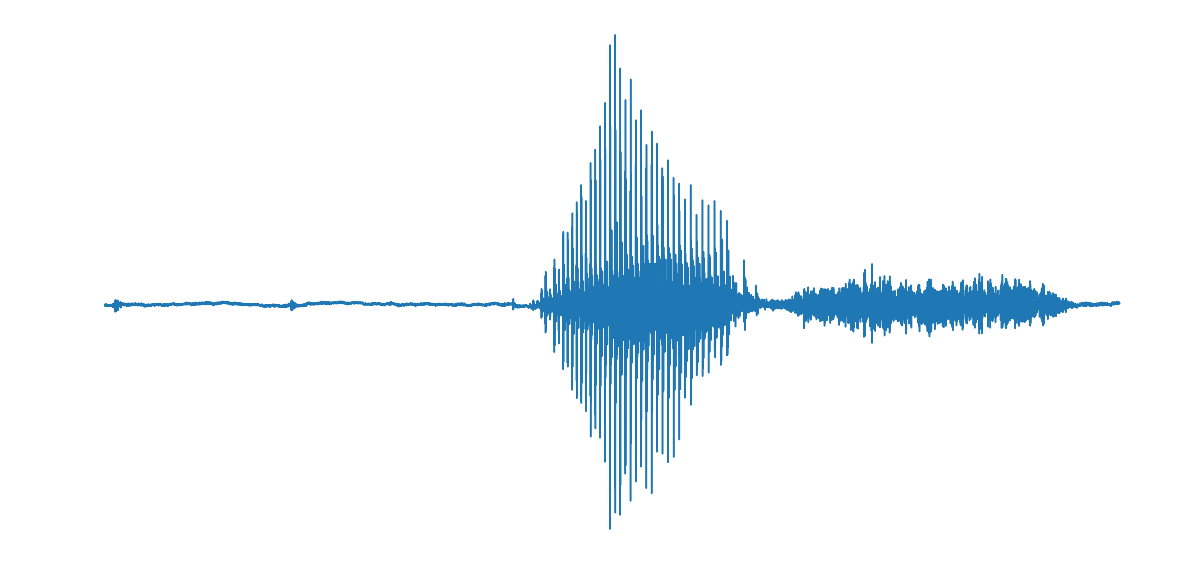

In [9]:
# Plot the wave to create the image file to train CNN
fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.plot(example)

<h3><strong>6. Spectrogram</strong></h3>
<p>"A spectrogram is a visual representation of the spectrum of frequencies of sound or other signal as they vary with time or some other variable". (Wikipedia)</p>
<p>In my project I will use spectograms to convert audio files to images to train my CNN and get a more accurate result. I will use various spectograms. I will plot a simple Spectrogram, a 3D Spectrogram and a MFCC Spectrogram.</p>
<p>In order to create a simple spectogram of the example audio file I will use Scipy library that includes scipy.signal.

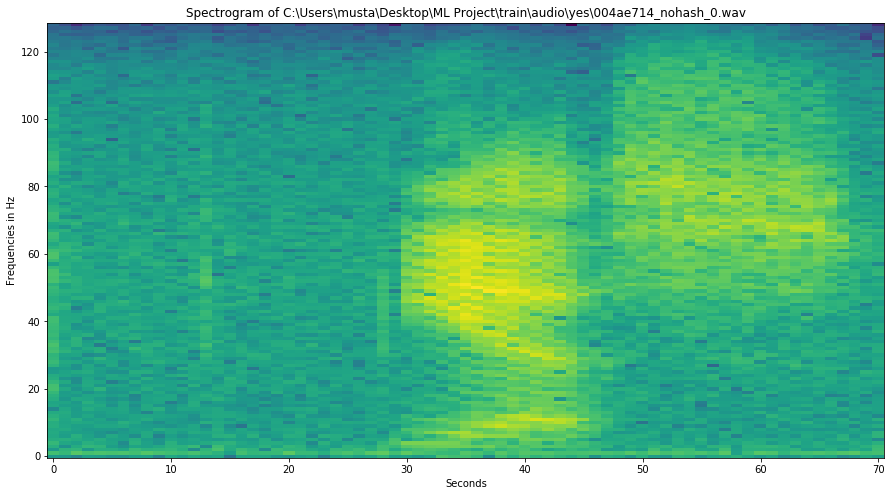

In [10]:
freqs, times, spec = signal.spectrogram(example, fs=example_rate)
spectrogram = np.log(spec.T.astype(np.float32))

fig = plt.figure(figsize=(15,8))
plt.title("Spectrogram of " + all_file_paths["yes"][0].split("/")[-1])
plt.xlabel("Seconds")
plt.ylabel("Frequencies in Hz")
plt.imshow(spectrogram.T, aspect='auto', origin='lower')

This is a simpler version for training:

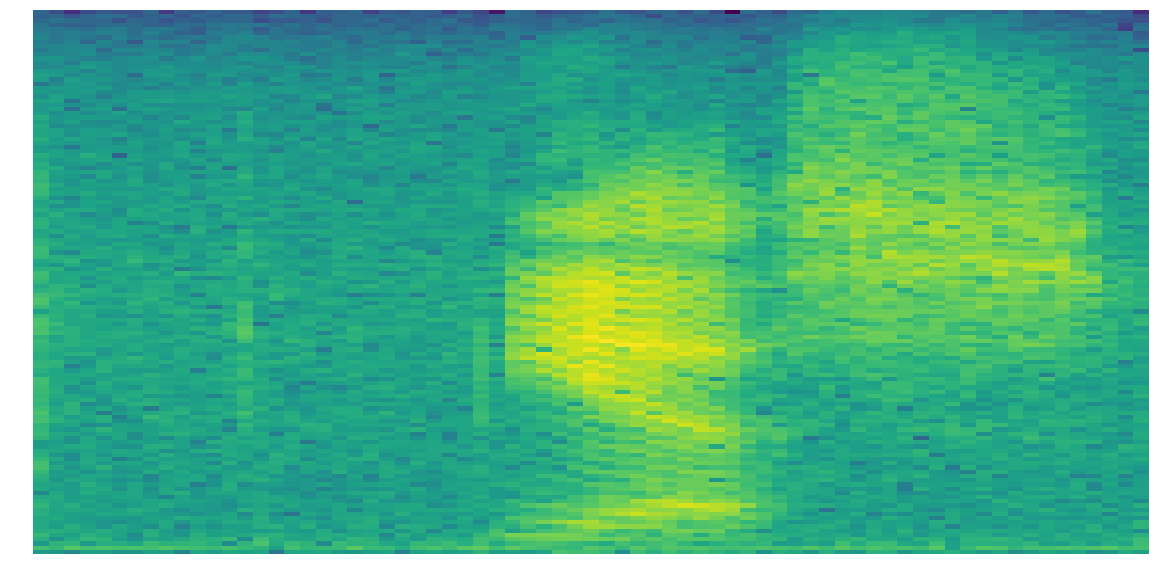

In [11]:
fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(spectrogram.T, aspect='auto', origin='lower')
fig.savefig(path+"\\bed\\aa__spectogram.png")

<h3><strong>7. 3D Spectrogram</strong></h3>
<p> Even more detailed version of the spectogram above is a 3D spectogram that plots the sound waves in a more detailed 3D environment. We are also able to see log amplitude in the third dimention. The graph itself may or may not be used in training however the data that forms the graph is available.

In [12]:
data = [go.Surface(z=spectrogram.T)]
layout = go.Layout(
    title='3D Spectrogram of ' + all_file_paths["yes"][0].split("/")[-1],
    scene = dict(
    yaxis = dict(title='Frequencies', range=freqs),
    xaxis = dict(title='Time', range=times),
    zaxis = dict(title='Log amplitude'),
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Data that makes the above 3D Spectrogram graph:

In [13]:
print(data)

[{'type': 'surface', 'z': array([[ -4.30451918,  -4.40448141,  -6.36250257, ...,  -4.56333923,
         -2.16126823,  -3.29671168],
       [  0.58776307,  -0.39111316,   1.81682217, ...,   1.92796326,
          0.32243648,   0.76910442],
       [ -4.29417562,  -0.8175627 ,  -0.58249062, ...,  -1.61119556,
         -2.75288415,   0.19753002],
       ..., 
       [-10.48404694,  -9.12868881,  -9.96156311, ..., -11.48041058,
        -12.53336334, -13.15655708],
       [-11.24522972, -10.71865273, -12.57979488, ..., -10.40248966,
        -11.68797207, -13.62787533],
       [-10.58478069, -13.26101875, -16.93719101, ..., -11.87519264,
        -12.03904724, -17.05837059]], dtype=float32)}]


<h3><strong>8. MFC</strong></h3>
<p>"In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency." (Wikipedia) </p>
<p>We can use MFC in Python with Librosa Library. The result can be seen below.</p>

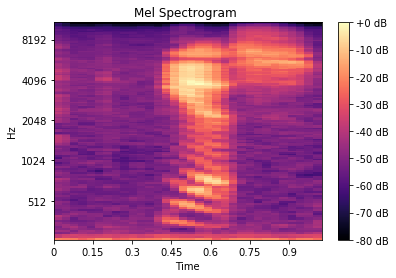

In [94]:
S = librosa.feature.melspectrogram(example, sr=example_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(log_S, sr=example_rate, x_axis='time', y_axis='mel')

plt.title('Mel Spectrogram ')
plt.colorbar(format='%+02.0f dB')

Simpler image version of the graph for training:

(0.0, 1.024, 25.793588878635166, 11025.0)

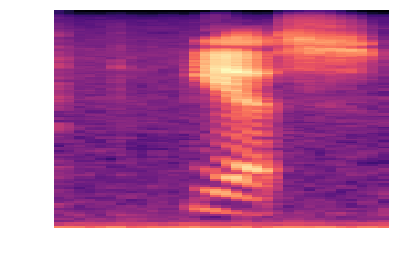

In [93]:
librosa.display.specshow(log_S, sr=example_rate, x_axis='time', y_axis='mel')
plt.axis("off")

<h3><strong>8. Roadmap</strong></h3>
<p>After this point I will write code to download the images and put them in folders accordingly. Then I will build CNN with Keras using TensorFlow backend. In the end I will use test set that includes 158.538 files to test my model and after reaching a reasonable accurecy rate I will submit my answer for the competition.</p>
<p>make_spectogram fucntion saves spectrogram image to the computer for training. Only problem with it is dimensions are too small.</p>

In [4]:
def make_spectrogram(word, count):
    example_rate, example = wavfile.read(all_file_paths[word][count])
    freqs, times, spec = signal.spectrogram(example, fs=example_rate)
    spectrogram = np.log(spec.T.astype(np.float32)+0.00000000001)

    fig = plt.figure(figsize=(15, 10))
    plt.axis("off")
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    
    path = "D:\\train_images\\"+word+"\\"+ all_file_paths[word][count].split("\\")[-1].split(".wav")[0]+"__spectogram.png"

    fig.savefig(path)  
    plt.close()

In [5]:
def make_mfc(word, count):
    example_rate, example = wavfile.read(all_file_paths[word][count])
    S = librosa.feature.melspectrogram(example, sr=example_rate, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)

    fig = plt.figure(figsize=(15, 10))
    plt.axis("off")
    plt.imshow(log_S, aspect='auto', origin='lower')
    
    path = "D:\\train_images\\"+word+"\\"+ all_file_paths[word][count].split("\\")[-1].split(".wav")[0]+"__mfc.png"
   
    fig.savefig(path)  
    plt.close()

In [9]:
def make_waveform(word, count):
    fig = plt.figure(figsize=(15,10))
    plt.axis("off")
    plt.plot(wavfile.read(all_file_paths[word][count])[1])
    fig.savefig("D:\\train_images\\"+word+"\\"+ all_file_paths[word][count].split("\\")[-1].split(".wav")[0]+"__waveform.png")  
    plt.close()
    fig = None
    gc.collect()

SystemError: <built-in method write of _io.BufferedWriter object at 0x000001AFD985CCA8> returned a result with an error set

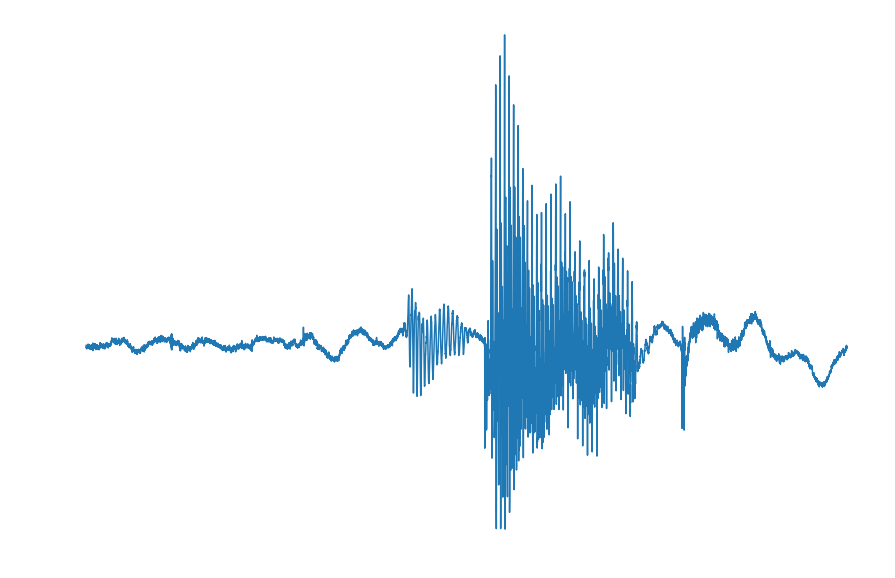

In [10]:
# WAVEFORM IMAGE DOWNLOAD
for j in words:
    if count < 2:
        count+=1
        continue
    for i in range(len(all_file_paths[j])):
        make_waveform(j, i)

In [ ]:
# SPECTOGRAM IMAGE DOWNLOAD
for j in words:
    if count == 0:
        count+=1
        continue
    for i in range(len(all_file_paths[j])):
        make_spectrogram(j, i)

In [ ]:
# MFC IMAGE DOWNLOAD
for j in words:
    if count == 0:
        count+=1
        continue
    for i in range(len(all_file_paths[j])):
        make_mfc(j, i)